#### Importamos las librerías:

In [21]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

#### Leemos el dataset

In [7]:
data_train = pd.read_csv('fashion-mnist_train.csv')
data_test = pd.read_csv('fashion-mnist_test.csv')

In [8]:
X_train = data_train.drop('label', axis=1)
y_train = data_train['label']


In [9]:
# Separar características y etiquetas en el conjunto de prueba
X_test = data_test.drop('label', axis=1)
y_test = data_test['label']


In [10]:
# Opcional: Estandarización de los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [16]:
# Crear una instancia del modelo de regresión logística
logistic_model = LogisticRegression(max_iter=60000, solver='lbfgs', multi_class='multinomial')

In [17]:
# Entrenar el modelo con los datos de entrenamiento
logistic_model.fit(X_train, y_train)

LogisticRegression(max_iter=60000, multi_class='multinomial')

In [18]:
# Realizar predicciones con los datos de prueba
y_pred = logistic_model.predict(X_test)

In [19]:
# Evaluar la precisión del modelo
print("Clasificación detallada del modelo de regresión logística:")
print(classification_report(y_test, y_pred))

Clasificación detallada del modelo de regresión logística:
              precision    recall  f1-score   support

           0       0.79      0.81      0.80      1000
           1       0.95      0.97      0.96      1000
           2       0.76      0.75      0.76      1000
           3       0.85      0.85      0.85      1000
           4       0.77      0.79      0.78      1000
           5       0.93      0.90      0.91      1000
           6       0.64      0.59      0.61      1000
           7       0.88      0.92      0.90      1000
           8       0.93      0.92      0.92      1000
           9       0.92      0.93      0.93      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



In [20]:
# Generar y visualizar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(conf_matrix)

Matriz de confusión:
[[815   2  18  41   3   4 102   0  14   1]
 [  2 970   3  16   0   1   7   1   0   0]
 [ 21   6 752  13 109   0  91   0   8   0]
 [ 33  27  15 852  30   2  26   2  12   1]
 [  2   3  83  31 794   2  78   0   7   0]
 [  2   4   0   0   1 904   0  58   5  26]
 [151   6 106  40  87   2 589   0  18   1]
 [  0   0   0   0   1  33   0 918   2  46]
 [ 10   2   8  12   4  13  24   7 918   2]
 [  1   0   0   0   0  16   0  52   1 930]]


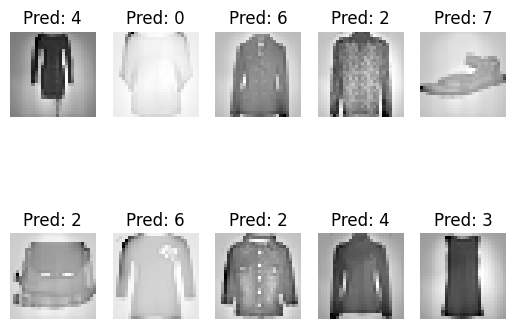

In [22]:
# Identificar predicciones incorrectas
incorrect_indices = np.where(y_pred != y_test)[0]
incorrect_images = X_test[incorrect_indices]
incorrect_labels = y_pred[incorrect_indices]

# Visualizar las primeras n imágenes incorrectas
n = 10  # Número de imágenes incorrectas que deseas mostrar
for i, (image, label) in enumerate(zip(incorrect_images[:n], incorrect_labels[:n])):
    plt.subplot(2, n//2, i+1)
    plt.imshow(image.reshape(28,28), cmap=plt.cm.gray_r)
    plt.title(f'Pred: {label}')
    plt.axis('off')
plt.show()